In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset : Women's E-Commerce Clothing Reviews**

ข้อมูลเกี่ยวกับรีวิวของลุกค้าเกี่ยวกับเครื่องแต่งกายผู้หญิงซึ่งประกอบด้วยตัวแปร 10 feature ประกอบด้วย 
 

*   Clothing ID : ตัวแปรที่ประกอบด้วยตัวเลขที่แสดงถึงประเภทของชิ้นส่วนที่รีวิว
*   Age : อายุของคนที่รีวิว
*  Title : หัวข้อของรีวิว
* Review Text:ข้อความที่ลูกค้ารีวิว
* Ratig : ความพึงพอใจของลูกค้า
* Recommended IND: ลูกค้าแนะนำสินค้านี้ต่อหรือไม่
* Division Name: ประเภทของ division
* Department Name: ประเภทของแผนก
* Class Name:ประเภทของสินค้า

ซึ่งการวิเคราะห์นี้เลือกเฉพาะรีวิวที่เกี่ยวกับ dress  ซึ่งประกอบไปด้วย 15 clothing id 
คือ  ['1072','1077','1078','1080','1081','1082','1083','1086','1087','1092','1094','1095','1099','1104','1110'] 

อย่างล่ะ 100 รีวิวมาพิจารณา และใช้เฉพาะ column Title และ Review Text มาวิเคราะห์ความรู้สึกของลูกค้าในแต่ละ clothing 

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [3]:
import pandas as pd
# อ่านข้อมูลจาก csv file
df=pd.read_csv('/content/drive/MyDrive/NLP/Day1/Sentiment_analysis/Womens Clothing E-Commerce Reviews Dresses 1500.csv')
df=df.drop(columns={'Unnamed: 0','Unnamed: 0.1'})
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1092,23,Love the dress just not on,"I loved this dress online, however i did not l...",4,1,1,General,Dresses,Dresses
1,1092,47,"Great every day, just needs a tuck...","Ok, the material is great, light & airy. the t...",4,1,2,General Petite,Dresses,Dresses
2,1092,59,Very short,This runs very short. i had to size up so i co...,5,1,2,General,Dresses,Dresses
3,1092,36,NaN,"I adore this dress, the perfect summer dress t...",5,1,22,General Petite,Dresses,Dresses
4,1092,78,Amazingly amazing,This dress is gorgeous. it looks exactly as it...,5,1,16,General,Dresses,Dresses


In [4]:
# กำหนดให้ Clothing ID,Title และ Review Text เป็น string
df['Clothing ID']=df['Clothing ID'].astype(str)
df['Title']=df['Title'].astype(str)
df['Review Text']=df['Review Text'].astype(str)

In [5]:
df['Title'][0]

'Love the dress just not on'

In [6]:
df['Review Text'][0]

'I loved this dress online, however i did not love it on me. it was a bit snug in the waist and bust (i usually order a 2 or 4 but got the dress in a 4). i thought i would love the mid length but it felt awkward on me (i\'m 5\'10"). i think its a beautiful dress just didn\'t work for me.'

In [7]:
pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_row', None)
pd.set_option('display.max_colwidth', None)

# Preprocessing text

In [8]:
# รวมข้อความจาก column Title กับ Review Text เป็น column Text
df['Text']=df.apply(lambda x:x['Title']+' '+x['Review Text'],axis=1)

In [9]:
df['Text'][0]

'Love the dress just not on I loved this dress online, however i did not love it on me. it was a bit snug in the waist and bust (i usually order a 2 or 4 but got the dress in a 4). i thought i would love the mid length but it felt awkward on me (i\'m 5\'10"). i think its a beautiful dress just didn\'t work for me.'

In [10]:
# เลือกเฉพาะ row ที่มีหัวข้อและรีวิว
df=df[df['Text']!='nan nan']

**การทำความสะอาดข้อความหรือ preprocessing**

*   แปลงตักอักษรจากตัวพิมพ์ใหญ่เป็นตัวพิมพ์เล็ก
*   ลบ punctuation ออกจากข้อความ
*   ลบคำที่ประกอบด้วยตัวเลข
*   ลบ ‘’“”… ออกจากข้อความ
*   ลบ \n,\r ,nan ออกจากข้อความ


In [11]:
import re
import string

def clean_text1(text):
    '''Make text lowercase,remove punctuation and remove words containing numbers.'''
    # กำหนดให้ตัวอักษรเป็นตัวเล็ก
    text = text.lower()
    # ลบ punctuation ออก
    text = re.sub(r'[{}]'.format(string.punctuation), ' ', text)
    # ลบคำที่ประกอบด้วยตัวเลข
    text = re.sub('\w*\d\w*', ' ', text)
    return text


In [12]:
# แปลงตัวอักษรให้เป็นตัวเล็ก ,ลบ punctuation ออก และลบคำที่ประกอบด้วยตัวเลขโดยใช้ 
# function clean_text1()
df['Clean Text'] = df['Text'].apply(lambda x: clean_text1(x))

In [13]:
def clean_text2(text):
    '''Get rid of some additional punctuation 
    and \n,\r in text'''
    # ลบเครื่องหมาย ‘’“”… จากข้อความซึ่งเครื่องหมายเหล่านี้ไม่มีใน string.punctuation
    text = re.sub('[‘’“”…]', ' ', text)
    # ลบ \n,\r ออกจากข้อความ
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('nan', ' ', text)

    return text

In [14]:
# ลบเครื่องหมาย ‘’“”… จากข้อความซึ่งเครื่องหมายเหล่านี้ไม่มีใน string.punctuation
# ลบ \n,\r ออกจากข้อความ
df['Clean Text'] = df['Clean Text'].apply(lambda x: clean_text2(x))

In [15]:
df['Clean Text'][780]

'stunning lace boho dress this is a gorgeous dress with a great  boho styling  the color in person is exactly as it s shown  it is wearable all throughout the year   easily paired with boots or sandals  while the fit is true to size  i found the lace detailing has no stretch to it so the bodice is a little tight  i love this dress and can t wait to wear it '

In [16]:
df['Clothing ID'].value_counts()

1095    100
1092     99
1110     99
1081     99
1077     98
1082     98
1086     98
1094     97
1099     97
1080     97
1083     97
1087     96
1072     95
1104     95
1078     94
Name: Clothing ID, dtype: int64

# sentiment analyze : polarity and subjectivity

**TextBlob** คือ open souce library ใช้ในกระบวนการทางภาษา (natural language processing หรือ NLP ) เช่น part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation และอื่นๆ แต่ในที่นี้จะใช้ library TextBlob ในการทำ sentiment analysis หรือการวิเคราะห์ความรู้สึกของลูกค้า โดย 
1. **TextBlob Module:** เป็นโมดูลที่นักวิจัยด้านภาษาศาสตร์ label คำที่เกี่ยวกับความรู้สึกในประโยค
2. **Sentiment Labels:** คำใน corpus จะถูก label ในด้านของความรู้สึก(polarity)และความคิดเห็น(subjectivity)
   * **Polarity**:แสดงความรู้สึกในด้านบวกและด้านลบโดย -1 คือมีความรู้สึกในด้านลบ ส่วน +1 ความรู้สึกในด้านบวก 
   * **Subjectivity**: แสดงข้อเท็จจริงกรือความคิดเห็นโดย 0 คือข้อเท็จจริงส่วน +1 คือความคิดเห็น 
  
reference link :
  

*   https://textblob.readthedocs.io/en/dev/
*   https://github.com/sloria/TextBlob


In [17]:
from textblob import TextBlob 
TextBlob("great").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [18]:
# หาค่า polarity จาก TextBlob โดยใช้ function TextBlob().sentiment.polarity
df['polarity'] = df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
# หาค่า subjectivity จาก TextBlob โดยใช้ function TextBlob().sentiment.subjectivity)
df['subjectivity'] =df['Clean Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [19]:
df[['Clothing ID','Clean Text','Class Name','polarity','subjectivity']][:10]

,Clothing ID,Clean Text,Class Name,polarity,subjectivity
0,1092,love the dress just not on i loved this dress online however i did not love it on me it was a bit snug in the waist and bust i usually order a or but got the dress in a i thought i would love the mid length but it felt awkward on me i m i think its a beautiful dress just didn t work for me,Dresses,0.181250,0.606250
1,1092,great every day just needs a tuck ok the material is great light airy the thing they don t show you is the waist line is tucked in the photo that s why you cant see the bi level hem line the hem line is fantastic the waist is the problem the whole dress just hangs huge from bust down the material is so light i would caution against darting the dress i created a button loop cinch under the outside corer of the pockets on the seem of the waist this worked for me,Dresses,0.374444,0.593889
2,1092,very short this runs very short i had to size up so i could wear as a dress still too short to wear to work with a cardi but adorable to wear to daytime summer events and date nights with hubby i am length may work better for shorter women love the style and fabric very feminine float and easy to wear with sandals on a hot summer day,Dresses,0.264815,0.573704
3,1092,i adore this dress the perfect summer dress that you can dress up or down the color is vibrant and the fabric flows and feels fantastic against your skin i love that you can still wear a strapless bra with it but with the adjustable shoulder ties you can have it go as low as you want for a more sexy look the bottom hem is this super cute fringe so fun and feminine and while it is a loose fitting dress i did not feel like my figure was drowned out by the fullness of the fabric this dress,Dresses,0.311966,0.547009
4,1092,amazingly amazing this dress is gorgeous it looks exactly as it appears on model the model must be wearing a petite because the regular size dress is maxi length on anyone the petite is midi length and is perfect every where else i am not petite but this petite worked perfect on me for midi length pros of dress the dress has nice light float fabric with colorblind on bottom for a touch of modern the dress looks very dowton abby and the vintage look is hard to find now days in dress the dress looks fa,Dresses,0.423485,0.633508
5,1092,pretty dress i love this dress but sadly for me it didn t look good on my body type i m a dd and not thin so it made me look like a beached whale i saw it on two different sales clerks in the stoe and they both looked adorable,Dresses,0.235714,0.807143
6,1092,weird fit in the bust i own many retailer dresses but the sizing can be odd i usually wear a size and i have a floreat maxi dress size that works well i am and based on the reviews i decided to order a size the dress fits well except for he bust area that is very snug couldn t even get the zipper up i will probably have to order a size to be able to close the zipper on the bust area but it will be huge everywhere else the fabric seems very delicate and may develop runs easily it s a shame because th,Dresses,0.156970,0.641667
7,1092,great dress for fall the dress is as great in person as it shows in the pictures if you usually buy petite keep in mind that you may like the regular size if you prefer the llonger look if you prefer a shorter length go for the petite size if this is what you usually get i am lbs and tried both xs regular and xs petite i ultimately went with the regular size as i preferred the longer length everything about this dress is perfect the color the material the cut highly recommended as a transition,Dresses,0.226000,0.477077
8,1092,beware if you re fuller in the chest i loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton it just looked so inviting so i grabbed two sizes to try on that of the time fit me with retailer clothes here are my thoughts pros lace detailing is lovely all over everything runs tts except at the bust see below br

# Graph

In [20]:
import plotly.express as px

# สร้าง box plot ของค่า polarity ซึ่งแบ่งตาม Clothing ID
fig = px.box(df, x="polarity", color="Clothing ID" ,
      hover_data=['Clothing ID','Title', 'Review Text', 'polarity','subjectivity'])
# update layout ของ graph
fig.update_layout(
  xaxis_title="polarity <-- Negative -------- Positive -->"
)

fig.show()

จากค่า polarity จะเห็นว่า


*   ค่า polarity ของรีวิวในแต่ละ Clothing ID จะอยู่ระหว่าง 0.1 ถึง 0.4 ซึ่งเป็นความรู้สึกของลูกค้าต่อสินค้าไปในทางด้านบวก
*   รีวิวความรู้สึกของลูกค้าต่อสินค้า Clothing ID ที่ 1104,1077 และ 1078 เป็นไปในทางบวกที่มีค่า Q3 ของ polarity > 0.4 ซึ่งสูงสุดเป็น 3 อันดับแรกในกลุ่มสินค้าที่เป็น dress
*  รีวิวความรู้สึกของลูกค้าต่อสินค้า Clothing ID ที่ 1104 มีการกระจายตัวมากที่สุดในกลุ่มของ dress



In [21]:
fig = px.box(df, x="subjectivity", color="Clothing ID",
        hover_data=['Clothing ID', 'Title',  'Review Text', 'polarity','subjectivity'])
# update layout ของ graph
fig.update_layout(
  xaxis_title="subjectivity <-- Facts -------- Opinions -->"
)

fig.show()

จากค่า subjectivity จะเห็นว่า


*   ค่า subjectivity ของรีวิวในแต่ละ Clothing ID จะอยู่ระหว่าง 0.4 ถึง 0.6 ซึ่งเป็นรีวิวที่แสดงทั้งข้อเท็จจริงและความคิดเห็นปนกัน
*  รีวิวลูกค้าต่อสินค้า Clothing ID ที่ 1082 และ 1086 มีการแสดงความคิดเห็นและข้อเท็จจริงที่มีการกระจายตัวมากที่สุดในกลุ่มของ dress

In [22]:
# หาค่า median ของ polarity และ subjectivityแต่ละ Clothing ID
data=df[['polarity','subjectivity','Clothing ID']].groupby(['Clothing ID']).median().reset_index()
data

,Clothing ID,polarity,subjectivity
0,1072,0.255038,0.607398
1,1077,0.267083,0.590952
2,1078,0.298814,0.576042
3,1080,0.269481,0.576190
4,1081,0.219932,0.572222
5,1082,0.223780,0.544921
6,1083,0.267708,0.594444
7,1086,0.228281,0.566394
8,1087,0.240745,0.587667
9,1092,0.228704,0.575000


In [23]:
# นำค่า polarity และ subjectivity มา plot ในรูปของ scatter plot เพื่อแสดงความรู้สึกของ
# ลูกค้าในทางบวกและทางลบ รวมถึงข้อเท็จจริงและความคิดเห็นของลูกค้า
#scatter plot ระหว่างค่า polarity และ subjectivity
fig = px.scatter(data, x="polarity", y="subjectivity", text="Clothing ID", 
 size_max=60)
# position ของ text Clothing ID
fig.update_traces(textposition='top center')
# update layout ของ graph 
fig.update_layout(
  height=600,
  title_text='polarity and subjectivity of Clothing ID',
  xaxis_title="polarity \n<-- Negative -------- Positive -->",
  yaxis_title="subjectivity \n<-- Facts -------- Opinions -->"
)

fig.show()

จากการหาค่า median ของ Clothing ID ในกลุ่มของ dress พบว่า


*   Clothing ID 1104 และ1078 รีวิวของลูกค้ามีความรู้สึกในทางบวกสูงสุด 2 อันดับแรกซึ่งในรีวิวมีทั้งความคิดเห็นและข้อเท็จจริง
*   รีวิวของสินค้าที่มี Clothing ID:1072 มีความคิดเห็นมากที่สุดในกลุ่ม และ Clothing ID:1082 มีข้อเท็จจริงมากที่สุด
*  รีวิวของสินค้าที่มี Clothing ID:1095 มีค่าความรู้สึกไปในทางบวกที่มีค่าความรู้สึกต่ำที่สุดแต่ในรีวิวมีทั้งข้อเท็จจริงและความคิดเห็น



# Wordcloud

In [25]:
# สร้าง list ของ Clothing ID
clothing_id=sorted(set(df['Clothing ID'].to_list()))

1072


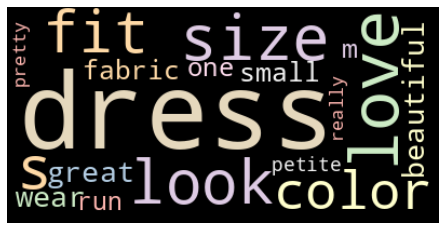

1077


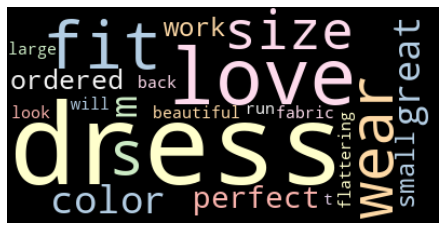

1078


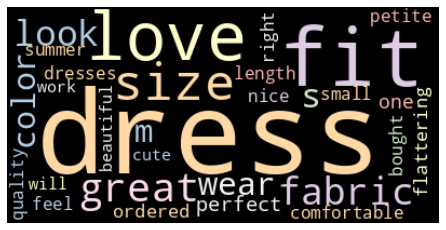

1080


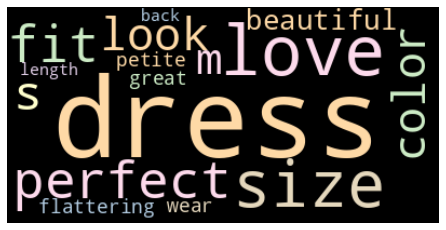

1081


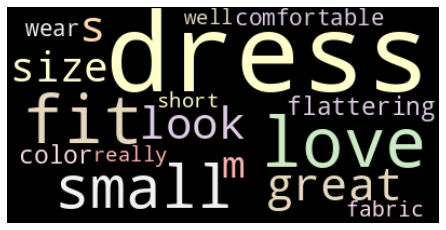

1082


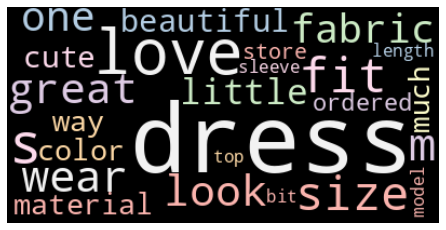

1083


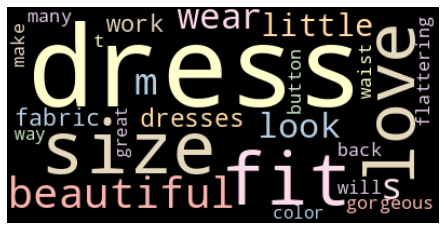

1086


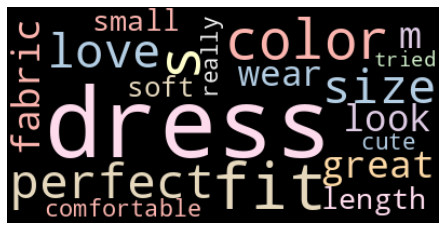

1087


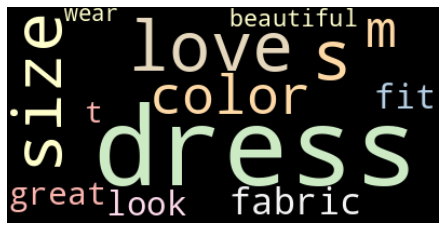

1092


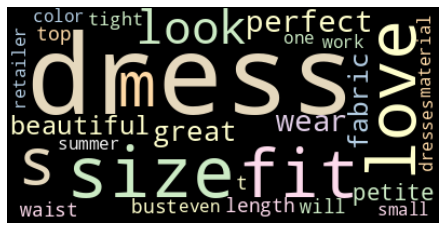

1094


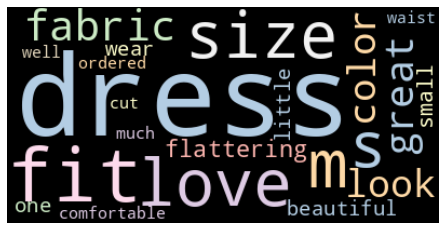

1095


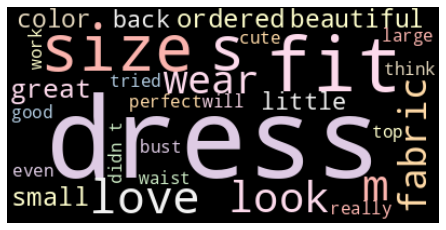

1099


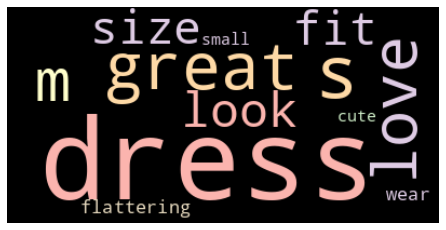

1104


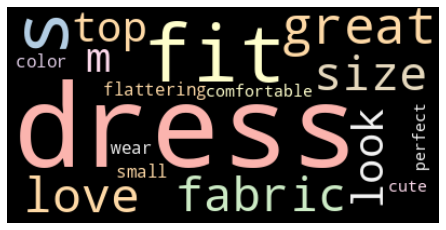

1110


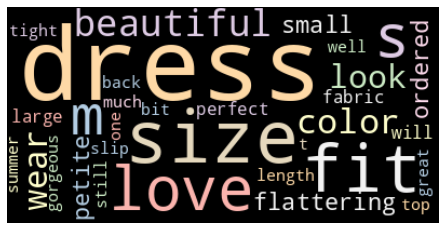

In [26]:
# สร้าง wordcloud ของคำในแต่ละ Clothing ID
from wordcloud import WordCloud ,STOPWORDS
from itertools import chain
import matplotlib.pyplot as plt 
# สร้าง wordcloud โดยไม่พิจารณาคำที่เป็น stopword เช่น i , do ,don't 
# และมี frequency สูงที่สุด 50 อันดับแรกในแต่ละ Clothing ID
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="black",
                      colormap="Pastel1",
                      min_font_size = 15,
                      max_words=50,
                      random_state=39)
for index,id in enumerate(clothing_id):
    print(id)
    # สร้าง list ของtext ในแต่ละClothing ID
    section_list=df[df['Clothing ID']==id]['Clean Text'].tolist()
    # รวม text จาก list ให้เป็น string
    section_ = ' '.join(section_list)
    # generate wordcloud
    wordcloud.generate(section_)
    plt.figure(figsize = (6, 8), facecolor = None) 
    plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()
    plt.close()

  จากการพิจารณาคำในแต่ละ Clothing ID พบว่าทุกClothing ID จะมีคำว่า dress มี frequency สูงสุดเนื่องจากรีวิวที่เลือกมาเป็นสินค้าประเภท dressอีกทั้งยังมีคำที่มีความรู้สึกไปทางบวกเช่น love ,beatiful ,great ,perfect ซึ่งทำให้ความรู้สึกของลูกค้าส่วนมากเป็นไปในทางบวกตามค่า polarity